# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
import pickle
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

/home/carnd/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/carnd/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
n_train = len(X_train)
n_test = len(X_test)

image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

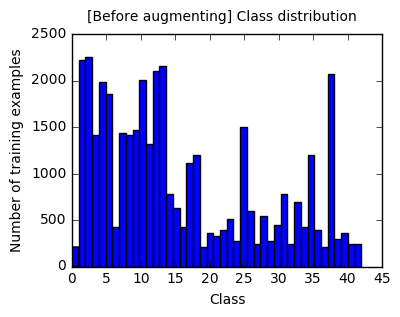

In [3]:
plt.figure(figsize=(4,3))

his = plt.hist(y_train, bins=n_classes, normed=False)
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.suptitle('[Before augmenting] Class distribution')


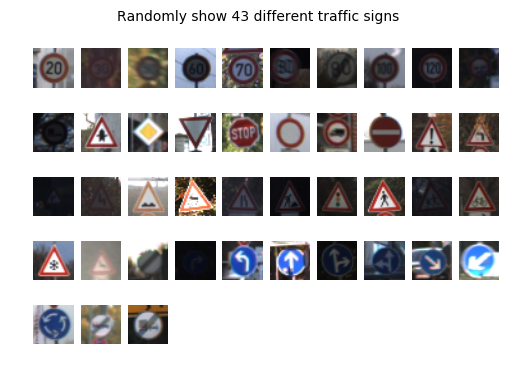

In [4]:
### Cluster the classes
#clusters = [[]]*43
clusters = [[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],
            [],[],[]]


for index, y_label in enumerate(y_train):
    clusters[y_label].append(index)
clusters = np.array(clusters)
#print(len(clusters[0]))

### Plot
for i in range(n_classes):
    plt.subplot(5, 10, i+1)
    index = np.random.randint(0, len(clusters[i]))
    plt.imshow(X_train[clusters[i][index]])
    plt.axis('off')
plt.suptitle('Randomly show 43 different traffic signs')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Sharpen the image
kernel_sharpen_edge = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

X_train_sharpen = []
for img in X_train:
    img_new = cv2.filter2D(img, -1, kernel_sharpen_edge)
    X_train_sharpen.append(img_new)
X_train_sharpen = np.array(X_train_sharpen)

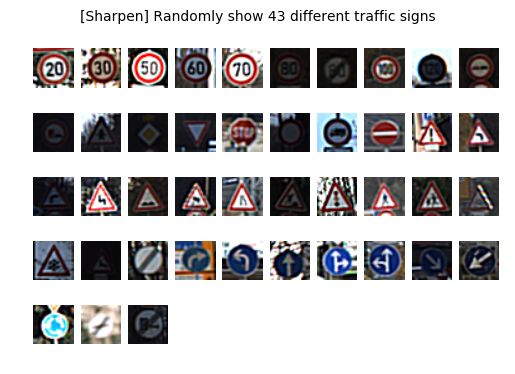

In [6]:
for i in range(n_classes):
    plt.subplot(5, 10, i+1)
    index = np.random.randint(0, len(clusters[i]))
    plt.imshow(X_train_sharpen[clusters[i][index]], cmap='gray')
    plt.axis('off')
plt.suptitle('[Sharpen] Randomly show 43 different traffic signs')

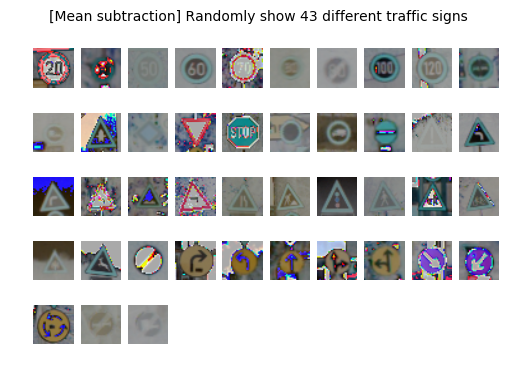

In [7]:
### Mean subtraction
mean_training = np.mean(X_train)
X_train_centered = X_train - mean_training

for i in range(n_classes):
    plt.subplot(5, 10, i+1)
    index = np.random.randint(0, len(clusters[i]))
    plt.imshow(X_train_centered[clusters[i][index]])
    plt.axis('off')
plt.suptitle('[Mean subtraction] Randomly show 43 different traffic signs')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
- **Sharpen the image:** use Edge Enhancement filter to sharp the images. This could potentially make learning of the neural network easier. 
- **Mean subtraction and normalization: ** `X -= np.mean(X)` or do so separately across three color channels. This enhances the robousness of the the learning algorithm. However normalization is not implemented images, because the numbers range from [0,255]. Note: any preprocessing statistics (e.g. the data mean) must only be computed on the training data, and then applied to the validation / test data.
- **Convert to the gray scale[Not implemented]:** intuitively, the color scale provides extra information for the neural network (NN). Therefore I did not systematically test the NN performance on the gray scale images.

In [8]:
### define augment function: warp --> brightness --> resize

def augment(img):
    rows, cols, n_channels = img.shape
    # Warp operation
    M = cv2.getRotationMatrix2D((cols/2,rows/2), np.random.uniform(-3.0, 3.0),1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    # Brightness operation
    alpha = np.random.uniform(0.5, 3.0)  #[0.5, 3.0]
    dst = cv2.multiply(dst, np.array([alpha]))
    
    # Resize operation
    # Only resize up, make the crop easier!
    dst = cv2.resize(dst, None, fx=np.random.uniform(1.0, 1.1), fy=np.random.uniform(1.0,1.1))
    dst = dst[:rows, :cols]
    return dst

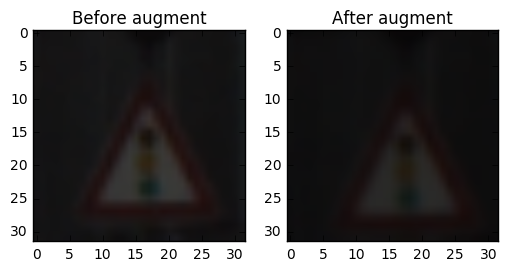

In [9]:
# Test the augmentation
img = X_train[np.random.randint(len(X_train))]
img_new = augment(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Before augment')
plt.subplot(1, 2, 2)
plt.imshow(img_new)
plt.title('After augment')

In [10]:
### Augment the training data set to have 'minimal' data set.

minimal_n_samples = 1000

X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()
for i in range(n_classes):
    print('Class:', i)
    n_samples = len(clusters[i])
    if  n_samples < minimal_n_samples:
        print('Augmenting...', 'Adding:', minimal_n_samples-n_samples)
        n = 0
        while n < (minimal_n_samples-n_samples):
            index = clusters[i][np.random.randint(n_samples)]
            img = X_train[index]
            new_img = augment(img)
            X_train_augmented = np.concatenate((X_train_augmented, [new_img]), axis=0)
            y_train_augmented = np.concatenate((y_train_augmented, [i]), axis=0)
            n += 1

pickle.dump(X_train_augmented, open('X_train_augmented.pckl', 'wb'))
pickle.dump(y_train_augmented, open('y_train_augmented.pckl', 'wb'))
print("Augment done!")

Class: 0
Augmenting... Adding: 790
Class: 1
Class: 2
Class: 3
Class: 4
Class: 5
Class: 6
Augmenting... Adding: 580
Class: 7
Class: 8
Class: 9
Class: 10
Class: 11
Class: 12
Class: 13
Class: 14
Augmenting... Adding: 220
Class: 15
Augmenting... Adding: 370
Class: 16
Augmenting... Adding: 580
Class: 17
Class: 18
Class: 19
Augmenting... Adding: 790
Class: 20
Augmenting... Adding: 640
Class: 21
Augmenting... Adding: 670
Class: 22
Augmenting... Adding: 610
Class: 23
Augmenting... Adding: 490
Class: 24
Augmenting... Adding: 730
Class: 25
Class: 26
Augmenting... Adding: 400
Class: 27
Augmenting... Adding: 760
Class: 28
Augmenting... Adding: 460
Class: 29
Augmenting... Adding: 730
Class: 30
Augmenting... Adding: 550
Class: 31
Augmenting... Adding: 220
Class: 32
Augmenting... Adding: 760
Class: 33
Augmenting... Adding: 311
Class: 34
Augmenting... Adding: 580
Class: 35
Class: 36
Augmenting... Adding: 610
Class: 37
Augmenting... Adding: 790
Class: 38
Class: 39
Augmenting... Adding: 700
Class: 40
Au

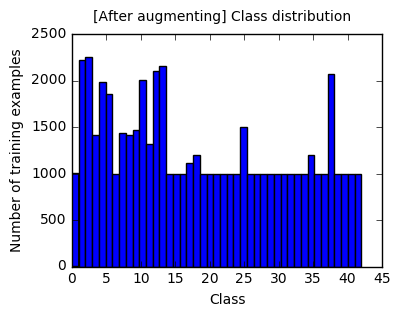

In [11]:
plt.figure(figsize=(4,3))

his = plt.hist(y_train_augmented, bins=n_classes, normed=False)
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.suptitle('[After augmenting] Class distribution')

In [12]:
### Shuffle the data
from sklearn.utils import shuffle

# Original data
#X_train, y_train = shuffle(X_train, y_train)

# Centered data
#X_train, y_train = shuffle(X_train_centered, y_train)

# Sharpened data
#X_train, y_train = shuffle(X_train_sharpen, y_train)

# Augmented data
X_train_augmented = pickle.load(open('X_train_augmented.pckl', 'rb'))
y_train_augmented = pickle.load(open('y_train_augmented.pckl', 'rb'))
X_train, y_train = shuffle(X_train_augmented, y_train_augmented)

In [13]:
### Split the data into training/validation/testing sets
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- Augment the data with a series of perturbations: Wrap, Brightness, Resize. This is to normalize the number of training data cross different classes. Augmenting the data could remove the learning bias when training.
- The training data has been further split into training and validation data (80% and 20%)

In [14]:
### Define the LeNet architecture
from tensorflow.contrib.layers import flatten

# Use color scale
n_channels = 3

def LeNet(x, n_channels):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    
    ###########
    # Layer 1: 
    ###########
    # Convolutional. Input = 32x32xnchannels. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, n_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ###########
    # Layer 2: 
    ###########
    #Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
    # Activation
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    ###########
    # Layer 3: 
    ###########
    # Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    ###########
    # Layer 4: 
    ###########
    # Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    ###########
    # Layer 5:
    ###########
    # Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is based on the LeNet architecture. 
    # Layer 1
    5x5 convolution (32x32x3 --> 28x28x6)
    ReLU
    2x2 max pool (28x28x6 --> 14x14x6)
    
    # Layer 2
    5x5 convolution (14x14x6 --> 10x10x6)
    ReLU
    2x2 max pool (10x10x16 --> 5x5x16)
    Flatten (5x5x6 --> 400)
    
    # Layer 3
    Fully connected (400 --> 120)
    ReLU
    
    # Layer 4
    Fully connected (120 --> 84)
    ReLU
    
    # Layer 5
    Fully connected (84 --> 43)

In [15]:
### Prepare to train the LeNet model

x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Hyperparameters
EPOCHS = 20 
BATCH_SIZE = 128
learning_rate = 0.001

# Net
logits = LeNet(x, n_channels)

# Loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Evalution
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    

In [9]:
### Start the training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset: end], y_train[offset: end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'lenet_augment')
    print('Model saved')

Training...

EPOCH 1 ...
Validation Accuracy = 0.902
EPOCH 2 ...
Validation Accuracy = 0.935
EPOCH 3 ...
Validation Accuracy = 0.950
EPOCH 4 ...
Validation Accuracy = 0.960
EPOCH 5 ...
Validation Accuracy = 0.965
EPOCH 6 ...
Validation Accuracy = 0.964
EPOCH 7 ...
Validation Accuracy = 0.955
EPOCH 8 ...
Validation Accuracy = 0.964
EPOCH 9 ...
Validation Accuracy = 0.966
EPOCH 10 ...
Validation Accuracy = 0.976
EPOCH 11 ...
Validation Accuracy = 0.979
EPOCH 12 ...
Validation Accuracy = 0.973
EPOCH 13 ...
Validation Accuracy = 0.956
EPOCH 14 ...
Validation Accuracy = 0.971
EPOCH 15 ...
Validation Accuracy = 0.972
EPOCH 16 ...
Validation Accuracy = 0.973
EPOCH 17 ...
Validation Accuracy = 0.969
EPOCH 18 ...
Validation Accuracy = 0.973
EPOCH 19 ...
Validation Accuracy = 0.966
EPOCH 20 ...
Validation Accuracy = 0.980
Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Adam Optimizer
- Softmax loss function

The final hyperparameters:

    mu = 0
    sigma = 0.05
    
    EPOCHS = 20 
    BATCH_SIZE = 128
    learning_rate = 0.001



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I am using a `color-version` LeNet architecture. My strategy is "Don't try to be the hero!". Data processing only involves the augmentation of each class to 1000 at least.

Starting with hyperparamenters from the LeNet lectures. Then tune them for the current task based on the validation accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

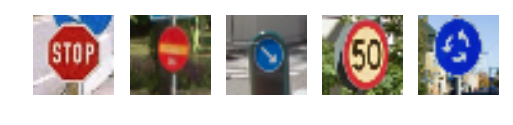

In [19]:
### Load and plot the images
import matplotlib.image as mpimg
import os

images = os.listdir("test_images/")

X_mytest = []
#y_mytest = np.array([40, 2, 14, 38, 17], dtype='uint8')
y_mytest = np.array([14, 17, 38, 2, 40], dtype='uint8')

for i, img in enumerate(images):
    image = cv2.imread('test_images/' + img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #matplotlib uses RGB whereas OpenCV uses BGR
    image = cv2.resize(image, dsize=(32,32))
    X_mytest.append(image)
    ax = plt.subplot(1, len(images), i+1)
    plt.imshow(image)
    plt.axis('off')
    
X_mytest = np.stack(X_mytest)

# preprocess
#X_mytest = X_mytest - mean_training

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images are screenshots from the google map street-view. Location: Lund, Sweden. Then they are converted from BGR to RGB and later resized to 32x32x3 to fit the NN. The resolution of the original images are randomly picked up. The 2nd sign (STOP sign) is a little challenge because the inner bar is white in the German data sets.

In [17]:
### Run the predictions

softmax_operation = tf.nn.softmax(logits)
top_k_operation = tf.nn.top_k(softmax_operation, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_augment.meta')
    saver.restore(sess, "./lenet_augment")

    sofmax_probabilities = sess.run(softmax_operation, feed_dict={x: X_test})
    top_k = sess.run(top_k_operation, feed_dict={x: X_test})

    test_accuracy = evaluate(X_test, y_test)    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.913


In [20]:
### Run the predictions

softmax_operation = tf.nn.softmax(logits)
top_k_operation = tf.nn.top_k(softmax_operation, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_augment.meta')
    saver.restore(sess, "./lenet_augment")

    sofmax_probabilities = sess.run(softmax_operation, feed_dict={x: X_mytest})
    top_k = sess.run(top_k_operation, feed_dict={x: X_mytest})

    test_accuracy = evaluate(X_mytest, y_mytest)    
    print("My test Accuracy = {:.3f}".format(test_accuracy))

My test Accuracy = 0.800


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

**Answer:**
My test accuarcy is 80%, namely 4 out of 5 is correct.  Although my test accuarcy is lower than the testing on the dataset (91%), it is still pretty satisfactory given the fact my test contains only 5 image!

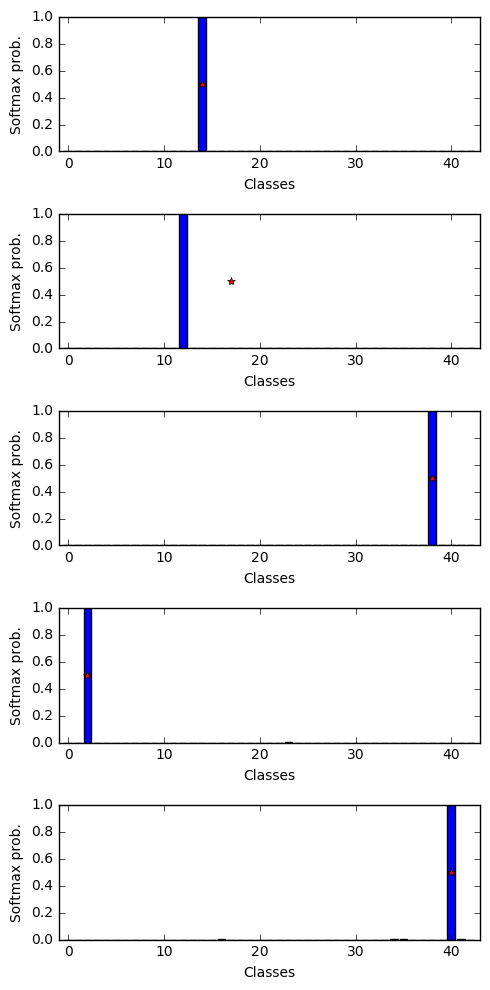

In [21]:
### Visualize the softmax probabilities
plt.figure(figsize=(5,10))

for i in range(5):
    ax = plt.subplot(5, 1, i+1)
    plt.bar(np.arange(n_classes), sofmax_probabilities[i], align='center')
    plt.plot(y_mytest[i], 0.5, 'r*')
    plt.xlim([-1, 43])
    plt.ylim([0, 1])
    plt.xlabel('Classes')
    plt.ylabel('Softmax prob.')
    plt.tight_layout()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

In [22]:
for i in range(5):
    print('True:',y_mytest[i], '----> Predicted top3:', top_k.indices[i])

True: 14 ----> Predicted top3: [14  0  1]
True: 17 ----> Predicted top3: [12 14 20]
True: 38 ----> Predicted top3: [38 36  2]
True: 2 ----> Predicted top3: [ 2 23 31]
True: 40 ----> Predicted top3: [40 41 35]


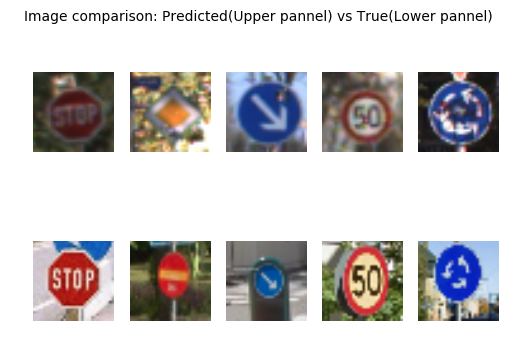

In [21]:
# reload the data first, it is a bug here
for i in range(5):
    plt.subplot(2, 5, i+1)
    j = top_k.indices[i][0]
    index = np.random.randint(0, len(clusters[j]))
    plt.imshow(X_train[clusters[j][index]])
    plt.axis('off')    
    plt.subplot(2, 5, i+6)
    plt.imshow(X_mytest[i])
    plt.axis('off')
plt.suptitle('Image comparison: Predicted(Upper pannel) vs True(Lower pannel)')

**Answer:**

The model is certain of 4 out of 5 images with high degree according to the softmax probability (~1). The NO ENTRY sign is incorrectly predicted. The NO ENTRY sign in the dataset has a white bar, whereas my NO TETRY sign has a yellow bar. Therefore it predicts something with a yellow area in the center (Major road sign).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.